In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

# Banking and Poverty
---

In [1]:
# Dependencies
from census import Census
from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt


# Census API Key
c = Census(census_key, year=2013)

## Data Retrieval

In [15]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("B01003_001E", "B17001_002E"), {
                         'for': 'zip code tabulation area:*'})

# # Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# # Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B17001_002E": "Poverty Count",
                                      "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd['Poverty Rate']=census_pd['Poverty Count']/census_pd['Population']*100
# Final DataFrame


# Visualize
census_pd.head()

,Population,Poverty Count,Zipcode,Poverty Rate
0,22121.0,2412.0,01832,10.903666
1,8295.0,191.0,01833,2.302592
2,6675.0,146.0,01834,2.187266
3,13527.0,1153.0,01835,8.523693
4,4547.0,1798.0,01840,39.542556


In [16]:
census_pd['Zipcode']

0        01832
1        01833
2        01834
3        01835
4        01840
         ...  
33115    99923
33116    99925
33117    99926
33118    99927
33119    99929
Name: Zipcode, Length: 33120, dtype: object

## Combine Data

In [17]:
# Import the zip bank data. Use dtype="object" to ensure all data is read in accurately.
bank_data_df=pd.read_csv('../Resources/zip_bank_data.csv')

# Visualize
bank_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Resources/zip_bank_data.csv'

In [ ]:
# Merge the two data sets along zip code
complete_df=pd.merge(bank_data_df, census_pd, how='left', on='Zipcode')

# Remove rows missing data
complete_df=complete_df.dropna()

# Visualize
complete_df.head()

## Heatmap of poverty rate

In [ ]:
# Configure gmaps with API key

In [ ]:
# Store 'Lat' and 'Lng' into  locations 

# Convert Poverty Rate to float and store


In [ ]:
# Create a poverty Heatmap layer


In [ ]:
# Convert bank rate to list


In [ ]:
# Create bank symbol layer


In [ ]:
# Create a combined map


## Statistical Analysis

#### Summary Statistics

In [20]:
# Mean, median, mode for Poverty Rate, Bank Count, Population

In [21]:
# Mean, median, mode for Poverty Rate
mean=round(complete_df['Poverty Rate'].mean(), 2)
median=round(complete_df['Poverty Rate'].median(), 2)
mode=round(complete_df['Poverty Rate'].mode(), 2)

In [22]:
complete_df.columns

Index(['Zipcode', 'Address', 'Median Age', 'Household Income',
       'Per Capita Income', 'Lat', 'Lng', 'Bank Count', 'Population',
       'Poverty Count', 'Poverty Rate'],
      dtype='object')

In [23]:
# Mean, median, mode for Bank Count
mean=round(complete_df['Bank Count'].mean(), 2)
median=round(complete_df['Bank Count'].median(), 2)
mode=round(complete_df['Bank Count'].mode(), 2)

In [24]:
# Mean, median, mode for Population
mean=round(complete_df['Population'].mean(), 2)
median=round(complete_df['Population'].median(), 2)
mode=round(complete_df['Population'].mode(), 2)

#### Linear Regression

R^2 Value: 0.0024938856796833846


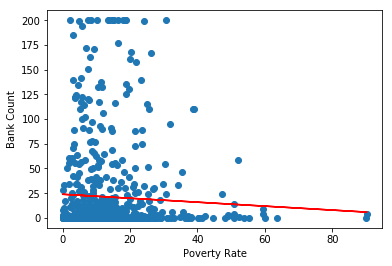

In [28]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values=complete_df['Poverty Rate']
y_values=complete_df['Bank Count']

# Run linear regression
slope, intercept, r_value, p_value, stderr=linregress(x_values, y_values)

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
y_predict=slope*x_values+intercept
plt.plot(x_values, y_predict, 'r')

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f'R^2 Value: {r_value**2}')

# Show plot
plt.show()

### Analysis